### Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Import openCV

In [ ]:
import cv2
cv2.__version__

'4.1.2'

### Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Read Image

In [ ]:
# import image in img variable

img = cv2.imread('/content/drive/MyDrive/Datasets/Learn-OpenCV-in-3-hours-master/Resources/lena.png')

##### Show image
For local machine:

In [ ]:
# cv2.imshow('Output', img) 
# # (window name where image is to be shown, image variable)
# cv2.waitKey(0)
# # arg = delay time in milli seconds
# # 0 means infinite delay i.e. will remain in the output

For Google Colab:

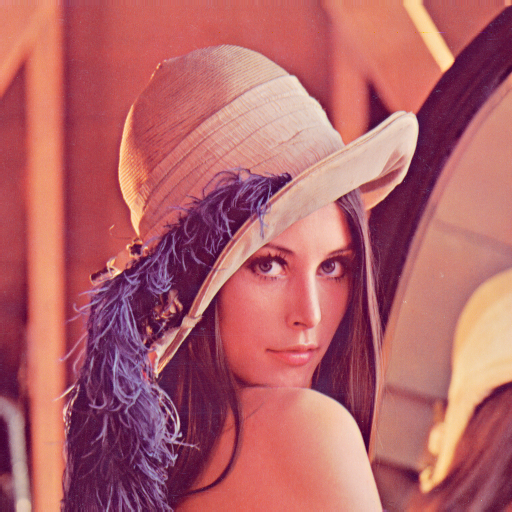

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

### Read Video
For local machine:

In [ ]:
# cap = cv2.VideoCapture('/content/drive/MyDrive/Datasets/Learn-OpenCV-in-3-hours-master/Resources/test_video.mp4')

# # Video is a sequence of images so use while loop to go through each frame

# while True:
#   success, img = cap.read()
#   cv2_imshow(img)
#   # add delay and wait for keyboard Q press to break out of the loop
#   if cv2.waitKey(1) & 0xFF==ord('q'):
#     break

# # cap.read() will read all the images
# # success is a boolean variable which tells whether images are captured sccessfully or not
# # img will store all the images

For Google Colab:
??

### Accessing Webcam
For local machine:

In [ ]:
# # Video is just like webcam
# # so instead of video path, give id of your webcam
# # arg id = 0 will access default webcam

# cap = cv2.VideoCapture(0)
# cap.set(3, 640) # id for width=3, 640 is width value
# cap.set(4, 480) # id for height=4, 480 is height value
# cap.set(10, 100) # id for brightness=10, brightness=100 

cv2.VideoCapture() is not opening the web camera when executing the command in Google Colab because the code runs on the “cloud” (i.e. on a remote server). The processing happens on google’s servers, they’ll have no physical access to your device. So when you trying to have VideoCapture read the first local (local to where the code runs) camera won’t work.
<br>
Since Colab is running in your browser, you need to use web APIs to access local hardware like a camera.
<br>
Google provided code to capture an image inside Google Colab but there no code to capture the video there.
<br>
The following code lets you take video inside of Google Colab. It uses Javascript inside of colab to access the client computer’s camera.<br>
For Google Colab:

In [ ]:
from IPython.display import display, Javascript,HTML
from google.colab.output import eval_js
from base64 import b64decode
 
def record_video(filename):
  js=Javascript("""
    async function recordVideo() {
      const options = { mimeType: "video/webm; codecs=vp9" };
      const div = document.createElement('div');
      const capture = document.createElement('button');
      const stopCapture = document.createElement("button");
       
      capture.textContent = "Start Recording";
      capture.style.background = "orange";
      capture.style.color = "white";
 
      stopCapture.textContent = "Stop Recording";
      stopCapture.style.background = "red";
      stopCapture.style.color = "white";
      div.appendChild(capture);
 
      const video = document.createElement('video');
      const recordingVid = document.createElement("video");
      video.style.display = 'block';
 
      const stream = await navigator.mediaDevices.getUserMedia({audio:true, video: true});
     
      let recorder = new MediaRecorder(stream, options);
      document.body.appendChild(div);
      div.appendChild(video);
 
      video.srcObject = stream;
      video.muted = true;
 
      await video.play();
 
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
 
      await new Promise((resolve) => {
        capture.onclick = resolve;
      });
      recorder.start();
      capture.replaceWith(stopCapture);
 
      await new Promise((resolve) => stopCapture.onclick = resolve);
      recorder.stop();
      let recData = await new Promise((resolve) => recorder.ondataavailable = resolve);
      let arrBuff = await recData.data.arrayBuffer();
       
      // stop the stream and remove the video element
      stream.getVideoTracks()[0].stop();
      div.remove();
 
      let binaryString = "";
      let bytes = new Uint8Array(arrBuff);
      bytes.forEach((byte) => {
        binaryString += String.fromCharCode(byte);
      })
    return btoa(binaryString);
    }
  """)
  try:
    display(js)
    data=eval_js('recordVideo({})')
    binary=b64decode(data)
    with open(filename,"wb") as video_file:
      video_file.write(binary)
    print(f"Finished recording video at:{filename}")
  except Exception as err:
    print(str(err))

In [ ]:
# # This code will record the video
# video_path = "/content/drive/MyDrive/Datasets/Learn-OpenCV-in-3-hours-master/Resources/test_video.mp4"
# record_video(video_path)

### Basic Functions Required for openCV

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Datasets/Learn-OpenCV-in-3-hours-master/Resources/lena.png')

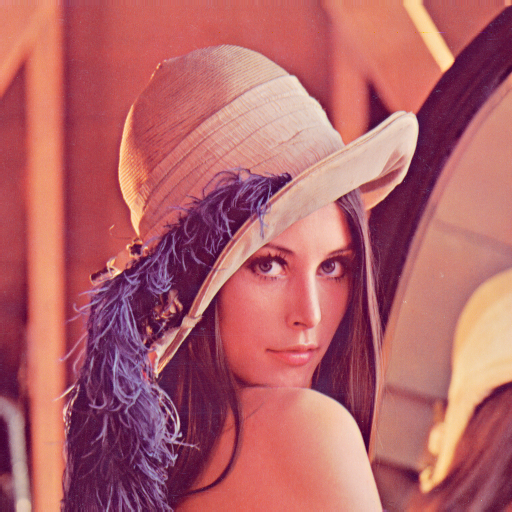

In [ ]:
cv2_imshow(img)
# for local machine add waitkey as well

##### Convert img to grayscale

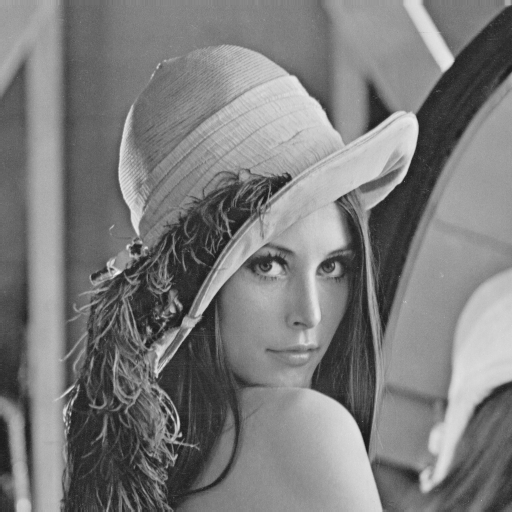

In [ ]:
# Converts img to different color spaces/channels
# Conventionally, we use RGB channels
# But, openCV uses BGR channels

# image to be converted = img
# converted to = cv2.COLOR_BGR2GRAY
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(imgGray)

##### Convert img to grayscale

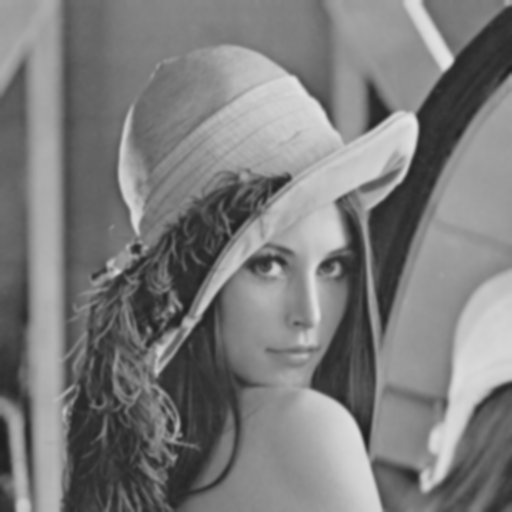

In [ ]:
# image to be converted = imgGray
# kernel-size = (odd_num1, odd_num1)
# sigma(x) = 0
imgBlur = cv2.GaussianBlur(imgGray, (7, 7), 0)
cv2_imshow(imgBlur)

##### Edge Detector: Find edges in image
Here, we use Canny edge detector

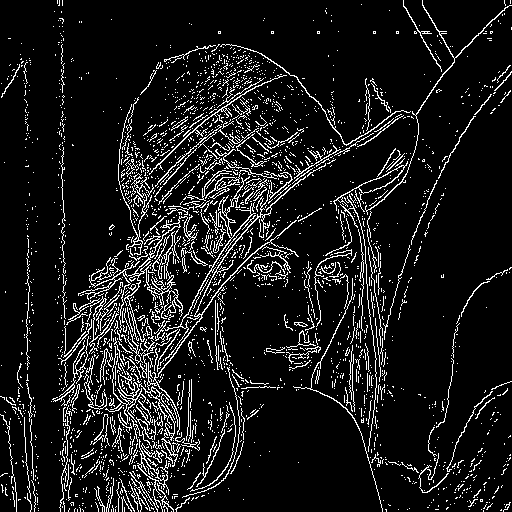

In [ ]:
# threshold values = 100, 100
# As the threshold increases, edges starts to vanish

imgCanny = cv2.Canny(img, 100, 100)
cv2_imshow(imgCanny)

#### Dialation: Increase thickness of edge

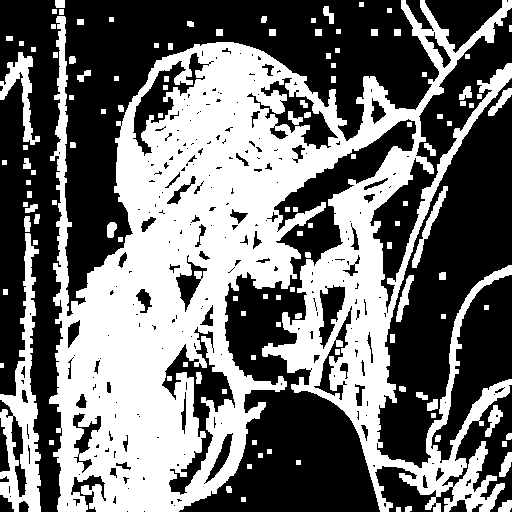

In [ ]:
# arg2
# Kernel: matrix size and value
# here we need matrix with all 1 values and (5, 5) size
# np.uint8 means values in range [0, 255] as image pixels values can only be in [0, 255]
# although here we are filling with only 1
kernel = np.ones((5,5), np.uint8)

# arg3
# how many iterations do we want our kernel to move around
# This means how much thickness do we actually need
# as iteration value increases, thickness of edges also increases

imgDialation = cv2.dilate(imgCanny, kernel, iterations=1)

cv2_imshow(imgDialation)

#### Erosion: Decreases thickness of edges

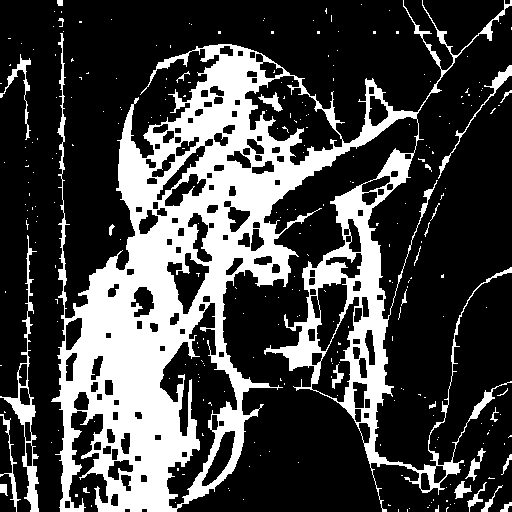

In [ ]:
imgEroded = cv2.erode(imgDialation, kernel, iterations=1)
cv2_imshow(imgEroded)

### Resizing and Cropping

#### Resizing

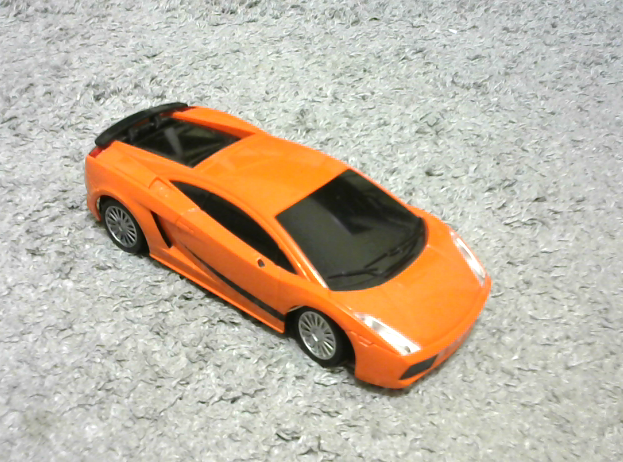

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Datasets/Learn-OpenCV-in-3-hours-master/Resources/lambo.PNG')

cv2_imshow(img)

NONETYPE obj has no attr clip means you're calling imshow with None instead of an image. This means image is not loaded in the img

In [ ]:
print(img.shape)
# (height, width, channel)
# (rows, cols, channels)

(462, 623, 3)


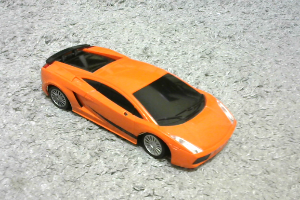

In [ ]:
# arg2 = (width, height)
imgResize = cv2.resize(img, (300, 200))
cv2_imshow(imgResize)

In [ ]:
print(imgResize.shape)
# (height, width, channel)

(200, 300, 3)


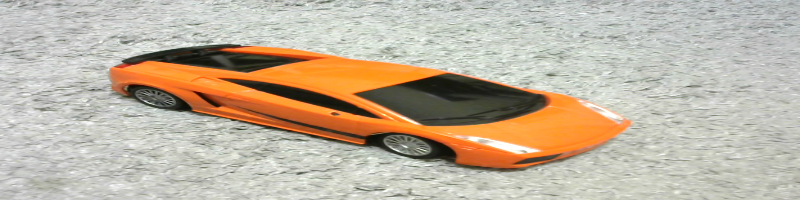

In [ ]:
# arg2 = (width, height)
imgResize = cv2.resize(img, (800, 200))
cv2_imshow(imgResize)

##### Cropping

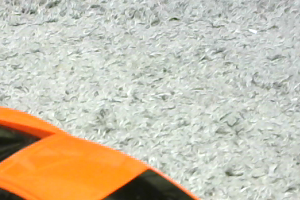

In [ ]:
# img[row_start, row_end, col_start:col_end]
# img[height_range, width_range]

imgCropped = img[0:200, 200:500]
cv2_imshow(imgCropped)

In [ ]:
 print(img.shape)
 print(imgCropped.shape)

(462, 623, 3)
(200, 300, 3)


### Shapes & Texts

##### Draw Square on image

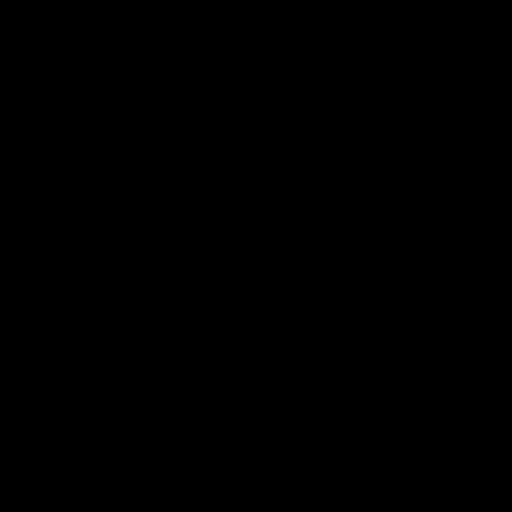

In [ ]:
# 0 means black
# img = np.zeros (512, 512) is grayscale as only 2 dimensions
# img = np.zeros (512, 512, 3) is colored as only 3 dimensions

img = np.zeros((512, 512, 3), np.uint8)
cv2_imshow(img)

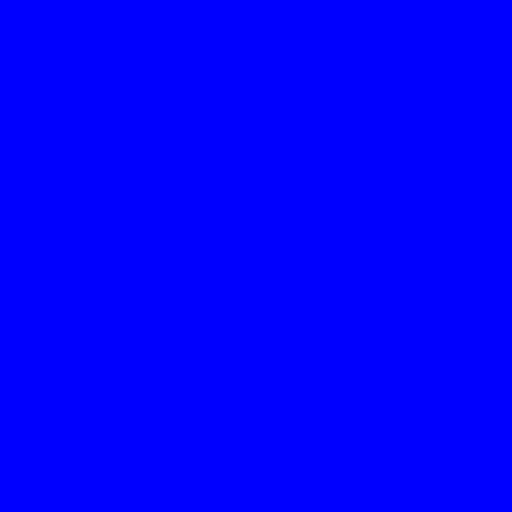

In [ ]:
# BGR
img[:] = 255, 0, 0
cv2_imshow(img)

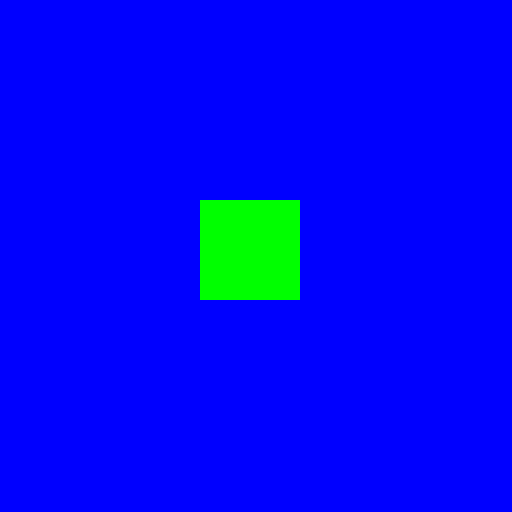

In [ ]:
img[200:300, 200:300] = 0,255,0
cv2_imshow(img)

#### Draw line on image

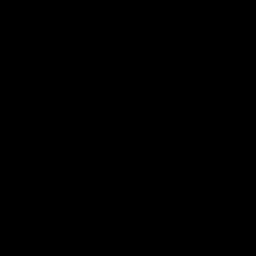

In [ ]:
img = np.zeros((256, 256, 3), np.uint8)
cv2_imshow(img)

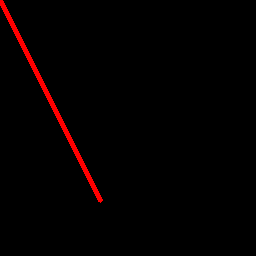

In [ ]:
# arg = (image, start_point(w, h), end_point, color, thickness)
cv2.line(img, (0,0), (100,200), (0,0,255), 3)
cv2_imshow(img)

##### Reactangle

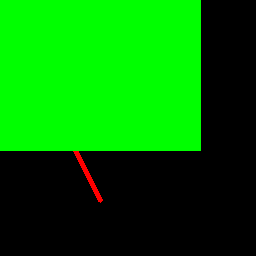

In [ ]:
cv2.rectangle(img, (0,0), (200, 150), (0,255,0), cv2.FILLED)
cv2_imshow(img)

##### Circles

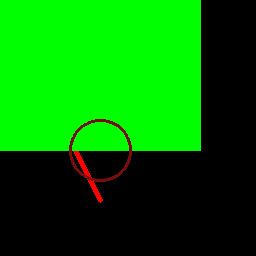

In [ ]:
# arg = (image, center, radius, color, thickness)
cv2.circle(img, (100, 150), 30, (11, 12, 122), 2)
cv2_imshow(img)

##### Text

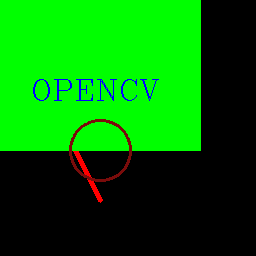

In [ ]:
# arg = (image, text, start_point, font-style, scale(font-size), color, thickness)
cv2.putText(img, 'OPENCV', (30,100), cv2.FONT_HERSHEY_COMPLEX, 1, (255,0,0), 1)
cv2_imshow(img)

### Warp perspective: Get bird's eye view of an image

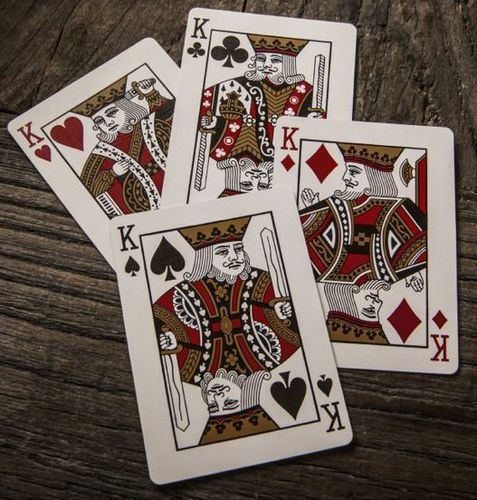

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Datasets/Learn-OpenCV-in-3-hours-master/Resources/cards.jpg')

cv2_imshow(img)

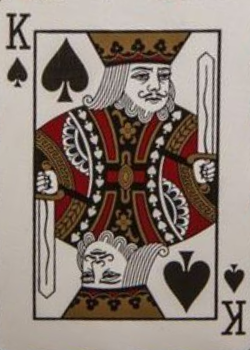

In [ ]:
width, height =  250, 350

pts1 = np.float32([[111,219],[287,188],[154,482],[352,440]])

pts2 = np.float32([[0,0],[width,0],[0,height],[width, height]])

matrix = cv2.getPerspectiveTransform(pts1, pts2)
imgOutput = cv2.warpPerspective(img, matrix, (width, height))
cv2_imshow(imgOutput)

### Joining images

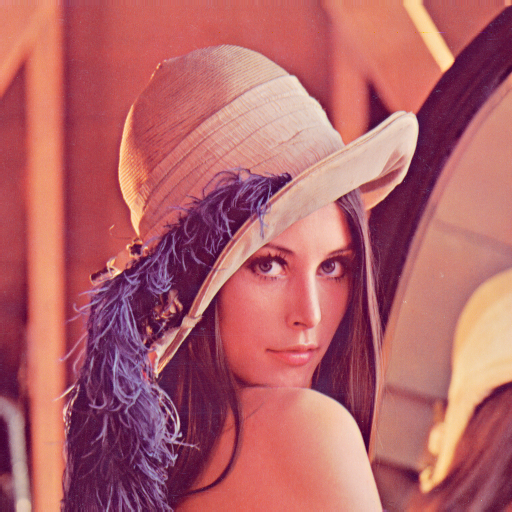

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Datasets/Learn-OpenCV-in-3-hours-master/Resources/lena.png')

cv2_imshow(img)

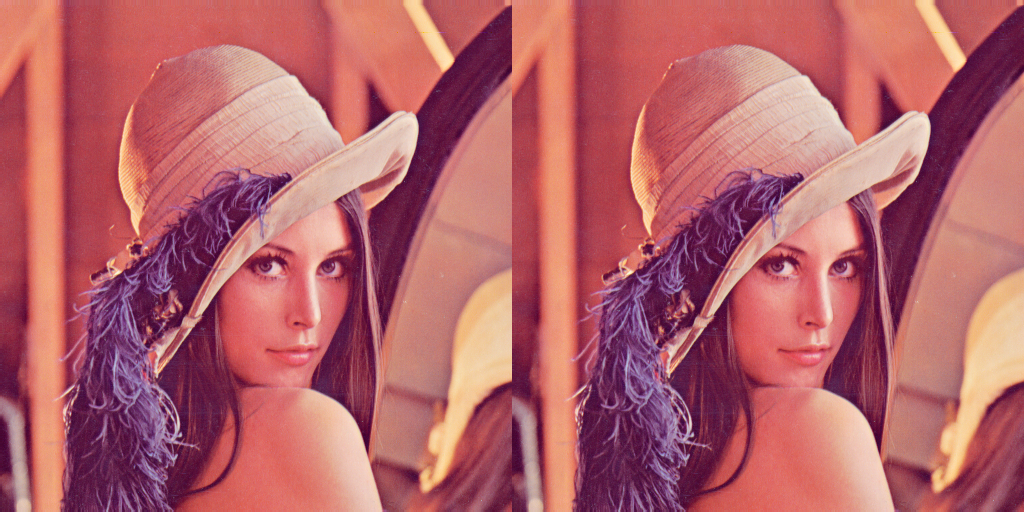

In [ ]:
imgHor = np.hstack((img, img))

cv2_imshow(imgHor)

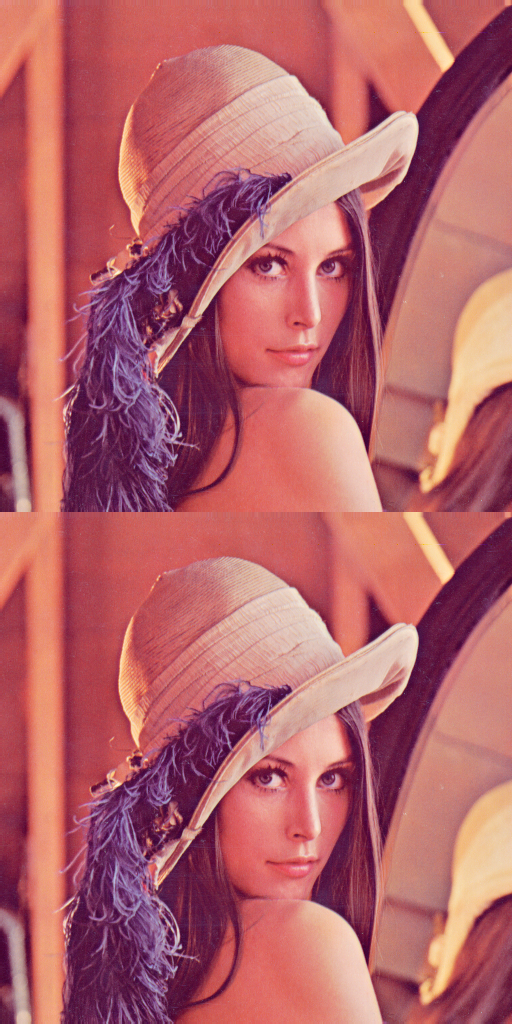

In [ ]:
imgVer = np.vstack((img, img))

cv2_imshow(imgVer)

For above two methods, the images should have same number of channels and the images can not be scaled down or up<br>So, instead use below function

In [ ]:
def stackImages(scale,imgArray):
    rows = len(imgArray)
    cols = len(imgArray[0])
    rowsAvailable = isinstance(imgArray[0], list)
    width = imgArray[0][0].shape[1]
    height = imgArray[0][0].shape[0]
    if rowsAvailable:
        for x in range ( 0, rows):
            for y in range(0, cols):
                if imgArray[x][y].shape[:2] == imgArray[0][0].shape [:2]:
                    imgArray[x][y] = cv2.resize(imgArray[x][y], (0, 0), None, scale, scale)
                else:
                    imgArray[x][y] = cv2.resize(imgArray[x][y], (imgArray[0][0].shape[1], imgArray[0][0].shape[0]), None, scale, scale)
                if len(imgArray[x][y].shape) == 2: imgArray[x][y]= cv2.cvtColor( imgArray[x][y], cv2.COLOR_GRAY2BGR)
        imageBlank = np.zeros((height, width, 3), np.uint8)
        hor = [imageBlank]*rows
        hor_con = [imageBlank]*rows
        for x in range(0, rows):
            hor[x] = np.hstack(imgArray[x])
        ver = np.vstack(hor)
    else:
        for x in range(0, rows):
            if imgArray[x].shape[:2] == imgArray[0].shape[:2]:
                imgArray[x] = cv2.resize(imgArray[x], (0, 0), None, scale, scale)
            else:
                imgArray[x] = cv2.resize(imgArray[x], (imgArray[0].shape[1], imgArray[0].shape[0]), None,scale, scale)
            if len(imgArray[x].shape) == 2: imgArray[x] = cv2.cvtColor(imgArray[x], cv2.COLOR_GRAY2BGR)
        hor= np.hstack(imgArray)
        ver = hor
    return ver

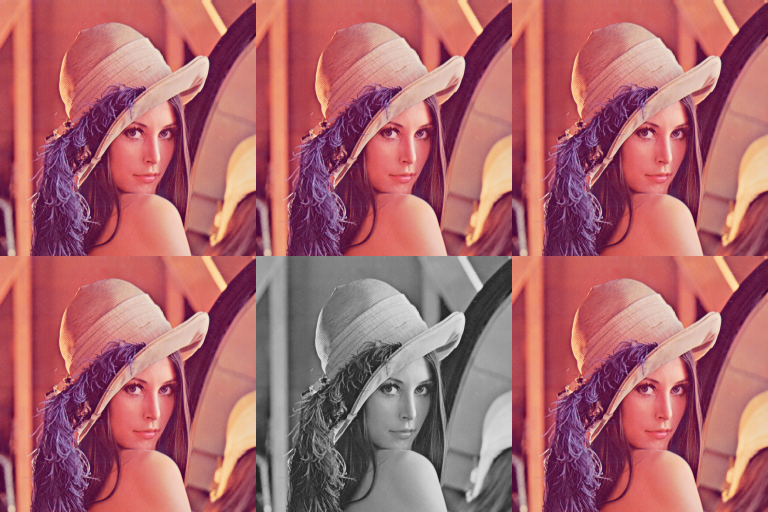

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Datasets/Learn-OpenCV-in-3-hours-master/Resources/lena.png')

imgStack = stackImages(0.5, ([[img, img, img], [img, imgGray, img]]))
# 0.5 is the scaling i.e. each image is half the original size
cv2_imshow(imgStack)

### Color detection

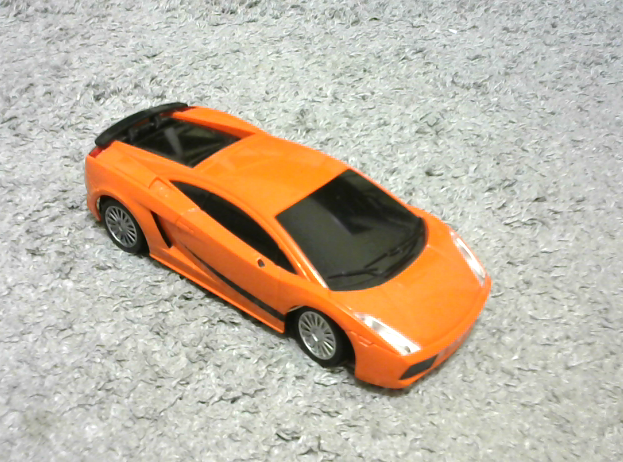

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Datasets/Learn-OpenCV-in-3-hours-master/Resources/lambo.PNG')

cv2_imshow(img)

##### Convert to HSV image
HSV – Hue, Saturation, and Value<br>
Hue, Saturation, and Value (HSV) is a color model that is often used in place of the RGB color model in graphics and paint programs. In using this color model, a color is specified then white or black is added to easily make color adjustments.

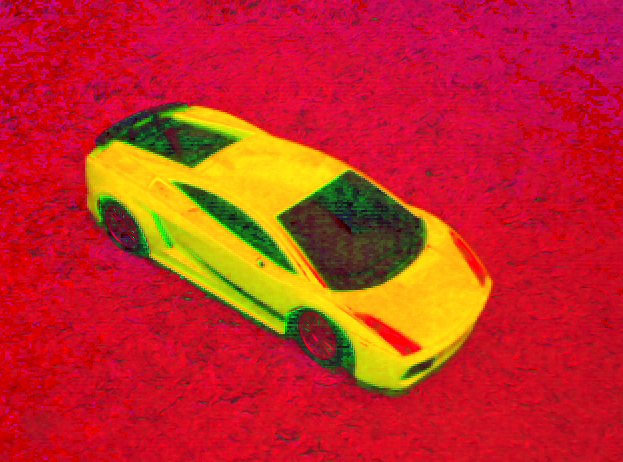

In [ ]:
imgHSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

cv2_imshow(imgHSV)

In [ ]:
def empty(a):
  pass

# cv2.namedWindow('TrackBars')
# cv2.resizeWindow('TrackBars', 650, 240)
# cv2.createTrackbar('Hue Min', 'TrackBars', 0, 179, empty)
# cv2.createTrackbar('Hue Max', 'TrackBars', 0, 179, empty)
# cv2.createTrackbar('Sat Min', 'TrackBars', 0, 255, empty)
# cv2.createTrackbar('Sat Max', 'TrackBars', 0, 255, empty)
# cv2.createTrackbar('Val Min', 'TrackBars', 0, 179, empty)
# cv2.createTrackbar('Val Max', 'TrackBars', 0, 179, empty)
# cv2_imshow('TrackBars')

error: ignored

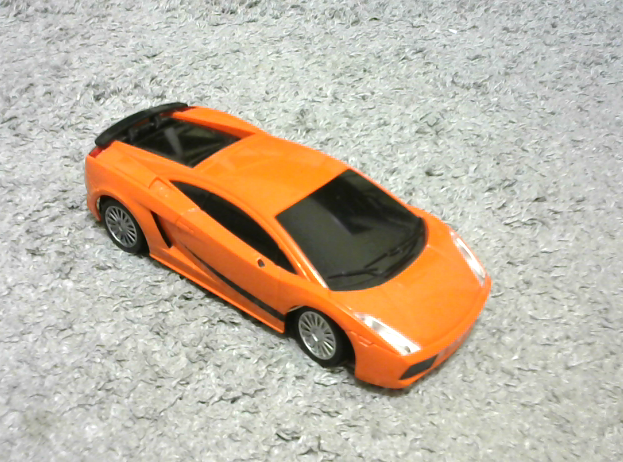